In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\train.csv")

In [3]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [4]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [6]:
df.shape

(10000, 12)

In [7]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [8]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [9]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [10]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [11]:
df['Severity'].value_counts(normalize=True)

Highly_Fatal_And_Damaging                  0.3049
Significant_Damage_And_Serious_Injuries    0.2729
Minor_Damage_And_Injuries                  0.2527
Significant_Damage_And_Fatalities          0.1695
Name: Severity, dtype: float64

In [12]:
df.nunique()


Severity                       4
Safety_Score                1175
Days_Since_Inspection         23
Total_Safety_Complaints       44
Control_Metric               952
Turbulence_In_gforces       1117
Cabin_Temperature            950
Accident_Type_Code             7
Max_Elevation               4191
Violations                     6
Adverse_Weather_Metric      4258
Accident_ID                10000
dtype: int64

In [13]:
df['Accident_Type_Code'].value_counts()

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

In [14]:
#for 
#    print(df.groupby('class').size())

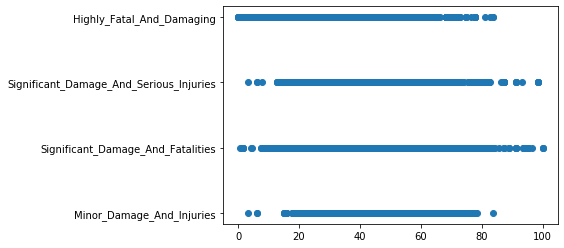

In [15]:
plt.scatter(df['Safety_Score'],df['Severity'])

In [16]:
#df.hist(figsize=(25,20))

In [17]:
#df.plot(kind='box', subplots=True, layout=(11,11), sharex=False, sharey=False, figsize=(512,256))

In [18]:
from pandas.plotting import scatter_matrix

In [19]:
#scatter_matrix(df,figsize=(50,40))

In [20]:
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le_Severity=LabelEncoder()
le_Severity.fit(df['Severity'])
df['Severity']=le_Severity.transform(df['Severity'])

In [23]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [25]:
df_1=df.set_index('Accident_ID')

In [26]:
df_1.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [27]:
y=df_1['Severity']


In [28]:
y.head()

Accident_ID
7570     1
12128    1
2181     2
5946     3
9054     2
Name: Severity, dtype: int32

In [29]:
ind=np.arange(1,11).tolist()

In [30]:
X=df_1.iloc[:,ind]

In [31]:
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [35]:
warnings.filterwarnings("ignore",category=FutureWarning)

In [36]:
kfold=StratifiedKFold(n_splits=10,random_state=12,shuffle=True)

In [37]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


C:\Users\shsubham\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
lr.coef_

array([[-4.37370734e-02, -1.55903886e-02, -1.05843165e-03,
         1.36816539e-02, -4.88800501e-05,  1.03889550e-02,
        -3.52733319e-03,  1.41418941e-05, -2.86452065e-04,
         5.99559679e-04],
       [ 2.17348768e-02,  1.08037579e-02,  2.31957912e-03,
        -5.14555305e-03, -1.45211623e-05, -7.28993946e-03,
        -8.82672770e-03, -6.45175466e-07, -6.95446926e-04,
         8.10895463e-04],
       [ 2.35852498e-02,  6.83377840e-03, -2.07889644e-03,
        -2.52298382e-02,  1.71233481e-04,  5.99684343e-03,
         6.03248079e-03, -1.05887752e-05,  1.48908970e-03,
         3.90328972e-05],
       [-1.58305319e-03, -2.04714772e-03,  8.17748965e-04,
         1.66937373e-02, -1.07832269e-04, -9.09585901e-03,
         6.32158010e-03, -2.90794337e-06, -5.07190713e-04,
        -1.44948804e-03]])

In [39]:
X.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [40]:
lr_predict=lr.predict(X_test)

In [41]:
f1_score(y_test,lr_predict,average='weighted')

0.38254991138603683

In [42]:
svc=SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
svc_predict=svc.predict(X_test)

In [44]:
f1_score(y_test,svc_predict,average='weighted')

0.14009831029185865

In [45]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
xgb_predict=xgb.predict(X_test)

In [47]:
f1_score(y_test,xgb_predict,average='weighted')

0.8403872642010841

In [48]:
def score(actual,predicted):
    return f1_score(actual,predicted,average='weighted')

In [49]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('xgboost',XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print(f'name:{name}   result_mean={cv_results.mean()}')
    print('{0}     {1:.2f}'.format(name,cv_results.mean()))

LR     0.55
KNN     0.41


In [50]:
def classification_model_evaluation(models,X_train,y_train,pcv=10,score='accuracy'):
    result={}
    for name,model in models:
        cv_result=cross_val_score(model,X_train,y_train,cv=pcv,scoring=score)
        result[name]=cv_result
        print('{0}     {1:.2f}'.format(name,cv_result.mean()))

In [51]:
classification_model_evaluation(models,X_train, y_train)

LR     0.55
KNN     0.41


In [52]:
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))]


In [53]:
name_lr,model_lr=models[0]

In [54]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
model_lr.coef_

array([[-1.28809185e-01, -4.23935585e-01,  2.24419634e-03,
         2.25199123e-02, -1.37375291e-04,  1.02641436e-01,
        -6.44889320e-02,  6.17479036e-06, -1.26833942e-02,
         1.17415750e-02],
       [ 8.09615894e-02,  2.69741127e-01,  7.29713517e-03,
        -1.22384264e-02, -2.26357439e-03, -7.59956951e-02,
        -3.49242846e-01,  1.52746230e-06, -3.96651586e-02,
         7.60262854e-03],
       [ 4.37355123e-02,  1.40338774e-01, -1.30743680e-02,
        -4.06906906e-02, -2.19095212e-03, -3.47182353e-02,
         1.08833017e-01, -1.27581485e-05,  3.32649630e-02,
         8.20695989e-03],
       [ 1.85614514e-03, -7.90207861e-03,  5.65054661e-04,
         2.00217946e-02, -2.71217205e-04, -2.95243369e-02,
         1.08255604e-02,  1.17714527e-06, -1.27114880e-03,
        -2.67736675e-03]])

In [56]:
lr_prob_result=model_lr.predict_proba(X_test)

In [57]:
model.fit(X_train,y_train)
xgb_cv_predict= model.predict(X_test)

In [58]:
from xgboost import plot_importance

In [59]:
#plot_importance(model)

In [60]:
xgb_cv_score=f1_score(y_test,xgb_cv_predict,average='weighted')

In [61]:
print(xgb_cv_score)

0.41248561189844873


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [64]:
parametres={}

In [65]:
df_result=pd.DataFrame({"original":y_test,"predicted":xgb_cv_predict})

In [66]:
df_result.count()

original     3000
predicted    3000
dtype: int64

In [67]:
df_pr=df_result.where(df_result['original']!=df_result['predicted'])

In [68]:
y_test

Accident_ID
2089     1
6990     2
8040     1
6311     2
6005     3
        ..
9090     3
6569     1
10381    3
4732     3
5998     1
Name: Severity, Length: 3000, dtype: int32

In [69]:
xgb_cv_predict

array([3, 0, 1, ..., 1, 0, 3])

In [70]:
pd.set_option('display.max_rows', 600)

In [71]:
pd.options.display.max_rows

600

In [72]:
df_pr.dropna(inplace=True)

In [73]:
xgb_prob=XGBClassifier()

In [74]:
xgb_prob.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
xgb_prob_result=xgb_prob.predict_proba(X_test)

In [76]:
xgb_prob_result

array([[0.18058996, 0.21480621, 0.21476345, 0.38984042],
       [0.33865198, 0.06004424, 0.58977664, 0.01152713],
       [0.07498699, 0.84637177, 0.04658901, 0.03205227],
       ...,
       [0.20513885, 0.5948219 , 0.12420595, 0.07583334],
       [0.21601991, 0.50341564, 0.03442759, 0.24613684],
       [0.2345982 , 0.3251329 , 0.09429467, 0.3459742 ]], dtype=float32)

In [77]:
pd.set_option('display.max_rows', 32000)

In [78]:
pd.options.display.max_rows

32000

In [79]:
#pd_df=pd.DataFrame(prob)

In [80]:
#print(pd_df)

In [81]:
df_result.reset_index()

,Accident_ID,original,predicted
0,2089,1,3
1,6990,2,0
2,8040,1,1
3,6311,2,1
4,6005,3,1
5,2359,0,3
6,9671,3,0
7,4591,3,3
8,1683,3,1
9,7085,3,3


In [82]:
lr_prob=lr.predict_proba(X_test)

In [83]:
lr_prob_df=pd.DataFrame(lr_prob)
lr_prob_df

,0,1,2,3
0,0.180816,0.310505,0.239248,0.269431
1,0.272166,0.294511,0.200677,0.232646
2,0.198817,0.273185,0.095257,0.432741
3,0.095936,0.352585,0.305271,0.246207
4,0.382192,0.193878,0.119342,0.304588
5,0.545786,0.132032,0.076627,0.245555
6,0.100179,0.349706,0.258156,0.291960
7,0.314418,0.241334,0.163597,0.280651
8,0.329734,0.228524,0.089569,0.352173
9,0.287359,0.266250,0.164378,0.282013


In [84]:
columns=df.columns

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.411000 (0.025387)


In [85]:
columns=df.columns

In [86]:
columns=[]
model_fs=XGBClassifier()
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for i in X_train.columns:
    columns.append(i)
    X_Sel=X_train.loc[:,columns]
    cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
    #print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
    print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))


 0.459571 (0.014569)
 0.763000 (0.009761)
 0.763429 (0.008335)
 0.872286 (0.010502)
 0.874857 (0.010770)
 0.876714 (0.012520)
 0.831714 (0.008871)
 0.826286 (0.005650)
 0.827286 (0.007862)
 0.823286 (0.005423)


In [87]:
print(columns)

['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']


In [88]:
new_col=['Safety_Score','Days_Since_Inspection','Control_Metric']
 
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

X_Sel=X_train.loc[:,new_col]
cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
#print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))



 0.877714 (0.012955)


In [89]:
model_fs.fit(X_Sel,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
X_test_new=X_test.loc[:,new_col]
New_predict=model_fs.predict(X_test_new)

In [91]:
f1_score(y_test,New_predict,average='weighted')

0.8855885777818006

In [92]:
col=['Safety_Score','Days_Since_Inspection','Control_Metric']
X_feature_sel=X_train.loc[:,col]

In [93]:
print(X_feature_sel)

             Safety_Score  Days_Since_Inspection  Control_Metric
Accident_ID                                                     
11023           67.305936                     12       72.743847
5629            59.406393                     11       76.937101
6782            50.273973                     10       78.714676
952             36.894977                     14       62.762078
1532            63.424658                      6       60.437557
3453            18.493151                     16       65.451231
9271            57.077626                      8       65.086600
5463            25.570776                     14       70.738377
10869           37.305936                     14       56.517776
7332            18.538813                     16       62.625342
2568            40.091324                     10       57.657247
3778            41.141553                     13       95.077484
9020            22.328767                     15       54.922516
10634           34.840183

In [94]:
x=20
y=40
print('X={0} {1}'.format(x,y))

X=20 40


In [95]:
df_test=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\test.csv")

In [96]:
df_test_sel=df_test.loc[:,new_col]
df_accid=df_test['Accident_ID']

In [97]:
df_test_sel.head()

,Safety_Score,Days_Since_Inspection,Control_Metric
0,19.497717,16,72.151322
1,58.173516,15,64.585232
2,33.287671,15,64.721969
3,3.287671,21,66.362808
4,10.867580,18,56.107566


In [98]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [99]:
test_predict=model_fs.predict(df_test_sel)

In [100]:
result=pd.DataFrame({'Accident':df_accid,'Severity':test_predict})

In [101]:
result['Severity']=result['Severity'].replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [102]:
print(result)

      Accident                                 Severity
0            1                Highly_Fatal_And_Damaging
1           10        Significant_Damage_And_Fatalities
2           14  Significant_Damage_And_Serious_Injuries
3           17                Highly_Fatal_And_Damaging
4           21        Significant_Damage_And_Fatalities
5           40        Significant_Damage_And_Fatalities
6           45        Significant_Damage_And_Fatalities
7           50                Highly_Fatal_And_Damaging
8           52                Highly_Fatal_And_Damaging
9           85  Significant_Damage_And_Serious_Injuries
10          95  Significant_Damage_And_Serious_Injuries
11         106  Significant_Damage_And_Serious_Injuries
12         111                Highly_Fatal_And_Damaging
13         123                Highly_Fatal_And_Damaging
14         129        Significant_Damage_And_Fatalities
15         130  Significant_Damage_And_Serious_Injuries
16         132                Highly_Fatal_And_D

In [103]:
le_Severity.classes_

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [104]:
test_predict_df=pd.DataFrame(test_predict)
result_final__1=test_predict_df.replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [105]:
#result=pd.DataFrame({'Accident':df_accid,'Severity':result_final__1})

In [106]:
result.to_csv("airplane_accident_prediction1.csv")

In [107]:
#result_final.head()

In [108]:
final_prob=xgb_prob_result+lr_prob_result

In [109]:
print(final_prob)

[[0.51187731 0.34327913 0.45001632 0.69482728]
 [0.82780872 0.2974947  0.66970202 0.20499455]
 [0.28702608 1.18714256 0.09982834 0.42600305]
 ...
 [0.21294595 1.06192748 0.52752795 0.19759864]
 [0.53913896 0.78024334 0.22475695 0.45586074]
 [0.45872023 0.48252401 0.390646   0.66810976]]


In [110]:
final_prob=final_prob/2

In [111]:
print(final_prob)

[[0.25593866 0.17163956 0.22500816 0.34741364]
 [0.41390436 0.14874735 0.33485101 0.10249728]
 [0.14351304 0.59357128 0.04991417 0.21300152]
 ...
 [0.10647297 0.53096374 0.26376398 0.09879932]
 [0.26956948 0.39012167 0.11237847 0.22793037]
 [0.22936011 0.241262   0.195323   0.33405488]]


In [112]:
type(final_prob)

numpy.ndarray

In [113]:
np.amax(final_prob,axis=1)

array([0.34741364, 0.41390436, 0.59357128, ..., 0.53096374, 0.39012167,
       0.33405488])

In [114]:
#final_prob_df=pd.DataFrame(final_prob)

In [115]:
index=np.where(final_prob==np.amax(final_prob))

In [116]:
final_predic=final_prob.argmax(axis=1)

In [117]:
fi_ens=f1_score(y_test,final_predic,average='weighted')

In [118]:
fi_ens

0.7959134854223721

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc=RandomForestClassifier(max_features=2,n_estimators=2)

In [121]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
rfc.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=2, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=298116265, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=2, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=298404071, splitter='best')]

In [124]:
X_Sel.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [125]:
#x_train.colu
rfc.feature_importances_

array([0.20840781, 0.13459025, 0.05284578, 0.13380616, 0.08505222,
       0.06457008, 0.11851162, 0.06192653, 0.02314952, 0.11714002])

In [126]:
col=X_train.columns

In [127]:
for i in range(df.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [128]:
rfc.feature_importances_

array([0.20840781, 0.13459025, 0.05284578, 0.13380616, 0.08505222,
       0.06457008, 0.11851162, 0.06192653, 0.02314952, 0.11714002])

In [129]:
zipped=zip(rfc.feature_importances_,col)

In [130]:
for value in zipped:
    print(value)

(0.20840781084899157, 'Safety_Score')
(0.13459025118570847, 'Days_Since_Inspection')
(0.052845780010081805, 'Total_Safety_Complaints')
(0.1338061615050016, 'Control_Metric')
(0.08505222085976959, 'Turbulence_In_gforces')
(0.0645700828265572, 'Cabin_Temperature')
(0.1185116218587023, 'Accident_Type_Code')
(0.061926528016208834, 'Max_Elevation')
(0.02314951970140783, 'Violations')
(0.11714002318757066, 'Adverse_Weather_Metric')


In [131]:
(X_Sel.columns)

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [132]:
import math

In [133]:
LR_Param={}
#depth_val=np.linspace(4,64,5,endpoint=True)
depth_val=[4,8,16,32]
#num_of_estmators=[10,20,30]
min_samples_leaf_val=[20,40,60,80,100]
max_features_val=[3,2,1]
#DecisionTree_param={'max_depth':depth,max_feature=max_feature_sel,min_sample_leaf=min_sample_leaf_val}
#np.arange is also available


In [134]:
def GridSearchRF(X_train,y_train):
    RandomForest_Param={'max_depth':depth_val,'min_samples_leaf':min_samples_leaf_val,'max_features':max_features_val}
    rfc=RandomForestClassifier()
    grid_search=GridSearchCV(estimator=rfc,param_grid=RandomForest_Param,cv=10)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    model=RandomForestClassifier(max_depth=grid_search.best_params_['max_depth'],max_features=grid_search.best_params_['max_features'],min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
    return model

In [135]:
#model=GridSearchRF(X_Sel,y_train)

In [136]:
#model

tree based parameters: max_depth = 5,min_child_weight = 1,gamma = 0,subsample, colsample_bytree = 0.8,scale_pos_weight = 1
uning Regularization Parameters: reg_alpha

In [137]:
#learning_rate_val=[0.01,0.02,0.04,0.08,.1,.2,.4,.8] #default .3
learning_rate_val=[.1,.2]
subsample_val=[.5,.6,.8,1]
colsample_bytree_val=[.5,.7,.9,1]
n_estimators_val=[50,100,200]
#min_child_weight_val=[1,2,3,4]
#objective_val=['binary:logistic','multi:softmax','multi:softprob']

In [138]:
def GridSearchXGBC(X_train,y_train):
    XGB_classifier_param={'learning_rate':learning_rate_val,'subsample':subsample_val,'colsample_bytree':colsample_bytree_val}
    xgbc=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=100,silent=0,learning_rate=.3,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=1)
    gs=GridSearchCV(estimator=xgbc,param_grid=XGB_classifier_param,cv=10)
    gs.fit(X_train,y_train)
    print(gs.best_params_)
    model=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=100,silent=0,learning_rate=gs.best_params_['learning_rate'],subsample=gs.best_params_['subsample_val'] ,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=gs.best_params_['cosample_bytree'])

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
def GridSearchGBM_1(X_train,y_train,lr=.3,trees=50):
    default_learning_rate=.3
    default_num_of_tree=50
    base_GBM=GradientBoostingClassifier(learning_rate=lr,n_estimators=trees,max_depth=6,max_features='sqrt',min_samples_split=50,min_samples_leaf=10,subsample=1.0,n_iter_no_change=20,validation_fraction=.2)
    max_depth_val=[10,30,50,70,90,20]
    #max_depth_val=[10]
    min_samples_split_val=[4,8,16,32,64,128,256,512]
    #min_samples_split_val=[4]
    tol=1e-4
    parametres={'max_depth':max_depth_val,'min_samples_split':min_samples_split_val}
    grid_model=GridSearchCV(estimator=base_GBM,param_grid=parametres,cv=10)
    grid_model.fit(X_train,y_train)
    return grid_model

In [141]:
#model1=GridSearchGBM_1(X_Sel,y_train)

In [142]:
#model1.best_estimator_

In [143]:
#model1.best_estimator_.feature_importances_

In [144]:
n_fe=len(X_Sel.columns)
num_of_features=[n_fe//2,n_fe//3,round(math.sqrt(n_fe))]

In [145]:
num_of_features

[1, 1, 2]

In [146]:
def GridSearchGBM(X_train,y_train,lr=.3,trees=50):
    default_learning_rate=.3
    default_num_of_tree=50
    base_GBM=GradientBoostingClassifier(learning_rate=lr,n_estimators=trees,max_depth=6,max_features='sqrt',min_samples_split=50,min_samples_leaf=10,subsample=1.0,n_iter_no_change=20,validation_fraction=.2)
    #max_depth_val=[10,30,50,70,90,20]
    max_depth_val=[10]
    #min_samples_split_val=[4,8,16,32,64,128,256,512]
    min_samples_split_val=[4]
    n_fe=len(X_Sel.columns)
    max_features_val=[n_fe//2,n_fe//3,round(math.sqrt(n_fe)),n_fe]
    tol=1e-4
    first_tuning={'max_depth':max_depth_val,'min_samples_split':min_samples_split_val,'max_features':max_features_val}
    grid_model=GridSearchCV(estimator=base_GBM,param_grid=first_tuning,cv=10)
    grid_model.fit(X_train,y_train)
    #learning-rate=2-10/num of trees
    #learning_rate_val=[.2,.1,.05,.02,.01]
    learning_rate_val=[.1]
    #n_estimators_val=[50,100,200,400,500,800,1000]
    n_estimators_val=[100,200]
    second_tuning={'learning_rate':learning_rate_val,'n_estimators':n_estimators_val}
    final_model=GridSearchCV(estimator=grid_model.best_estimator_,param_grid=second_tuning,cv=10)
    final_model.fit(X_train,y_train)
    return final_model

In [147]:
#model2=GridSearchGBM(X_Sel,y_train)

In [148]:
def GridSearchXGBC(X_train,y_train,lr=.3,trees=50):
    #XGB_classifier_param={'learning_rate':learning_rate_val,'subsample':subsample_val,'colsample_bytree':colsample_bytree_val}
    base_XGBC=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=trees,silent=0,learning_rate=lr,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=1)
    max_depth_val=[100]
    #max_depth_val=[10,30,50,70,90,20]
    min_child_weight_val=[1]
    #min_child_weight_val=[1,2,4,8] #equivalent of min_child_leaf in GBM
    #eta=learning_rate
    first_tuning={'max_depth':max_depth_val,'min_child_weight':min_child_weight_val}
    grid_model=GridSearchCV(estimator=base_XGBC,param_grid=first_tuning,cv=10)
    grid_model.fit(X_train,y_train)
    #learning-rate=2-10/num of trees
    #learning_rate_val=[.2,.1,.05,.02,.01]
    learning_rate_val=[.2,.1]
    #n_estimators_val=[50,100,200,400,500,800,1000]
    n_estimators_val=[100,200]
    second_tuning={'learning_rate':learning_rate_val,'n_estimators':n_estimators_val}
    final_model=GridSearchCV(estimator=grid_model.best_estimator_,param_grid=second_tuning,cv=10)
    return final_model
     

In [149]:
#model3=GridSearchXGBC(X_Sel,y_train)

In [156]:
def GridSearchRandomForest(X_train,y_train,trees=50):
    base_random_forest=RandomForestClassifier(n_estimators=trees,random_state=108 )
    #max_depth_val=[10,30,50,70,100]
    max_depth_val=[10]
    #min_samples_split_val=[2,4,8,12,16]
    min_samples_split_val=[4]
    #min_samples_leaf_val=[2,4,6,8,10]
    min_samples_leaf_val=[2]
    first_tuning={"max_depth":max_depth_val,"min_samples_split":min_samples_split_val,"min_samples_leaf":min_samples_leaf_val}
    model1=GridSearchCV(estimator=base_random_forest,param_grid=first_tuning,cv=10)
    model1.fit(X_train,y_train)
    #n_estimators_val=[100,200,400,600]
    n_estimators_val=[100]
    max_features_val=[.5,1.0]
    second_tuning={"n_estimators":n_estimators_val,"max_features":max_features_val}
    final_model=GridSearchCV(estimator=model1.best_estimator_,param_grid=second_tuning,cv=10)
    final_model.fit(X_train,y_train)
    return final_model

In [157]:
model4=GridSearchRandomForest(X_Sel,y_train)

In [158]:
model4.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=108,
                       verbose=0, warm_start=False)

In [159]:
from sklearn.model_selection import RandomizedSearchCV

In [160]:
def RandomSearchRandomForest(X_train,y_train,trees=50):
    n_estimators_val = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    max_features_val = ['auto', 'sqrt'] #[.2,.4,.6,.8]
    max_depth_val = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth_val.append(None)
    min_samples_split_val = [2, 5, 10]
    min_samples_leaf_val = [1, 2, 4]
    bootstrap_val = [True, False]
    random_grid={'n_estimators':n_estimators_val,'max_features':max_features_val,'max_depth':max_depth_val,
                 'min_samples_split':min_samples_split_val,
                 'min_samples_leaf':min_samples_leaf_val,
                 'bootstrap':bootstrap_val
                }
    base_model=RandomForestClassifier(random_state=108)
    random_model=RandomizedSearchCV(estimator=base_model,param_distributions=random_grid,n_iter=100,cv=10,random_state=108,return_train_score=True)
    random_model.fit(X_train,y_train)
    return random_model

In [162]:
model5=RandomSearchRandomForest(X_Sel,y_train)

In [181]:
(model5.cv_results_['rank_test_score'])


array([39,  8, 19, 38,  8, 51, 69, 79, 64,  3, 41, 19, 77, 47, 56, 93, 18,
       89, 62,  1, 85, 19, 87,  8, 69, 67,  3, 79, 96,  8, 99, 52, 60, 24,
       74,  8, 61, 28, 34, 90, 98, 47, 69, 43, 79, 43, 67, 69, 93, 39, 99,
       43, 55, 32, 79, 92, 24, 91, 19, 59, 47, 32, 85,  8, 73,  3, 97, 58,
       28, 63, 28, 35,  8, 76, 47, 41, 95, 43, 79, 52,  8,  8, 78, 19, 28,
       64, 79, 24, 52,  1, 88, 37, 56, 66, 36, 74,  8,  3,  3, 24])

In [173]:
FM.feature_importances_

array([0.55757377, 0.2534662 , 0.18896003])

In [171]:
FM1=RandomForestClassifier()

In [172]:
FM1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
FM.fit(X_Sel,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=108,
                       verbose=0, warm_start=False)

In [169]:
FM.feature_importances_

array([0.55757377, 0.2534662 , 0.18896003])

In [182]:
X_Sel.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')